In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면
# from matplotlib.font_manager import FontProperties
# font_path = r'C:\Windows\Fonts\HMFMPYUN.TTF'
# font_prop = FontProperties(fname=font_path, size=10)
# plt.rc('font', family=font_prop.get_name())

# warning(경고) 안보이게
warnings.filterwarnings(action='ignore')

In [6]:
# 문제 1번
df_first = pd.read_csv(r'C:\ai\downloads\shareData\부동산\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


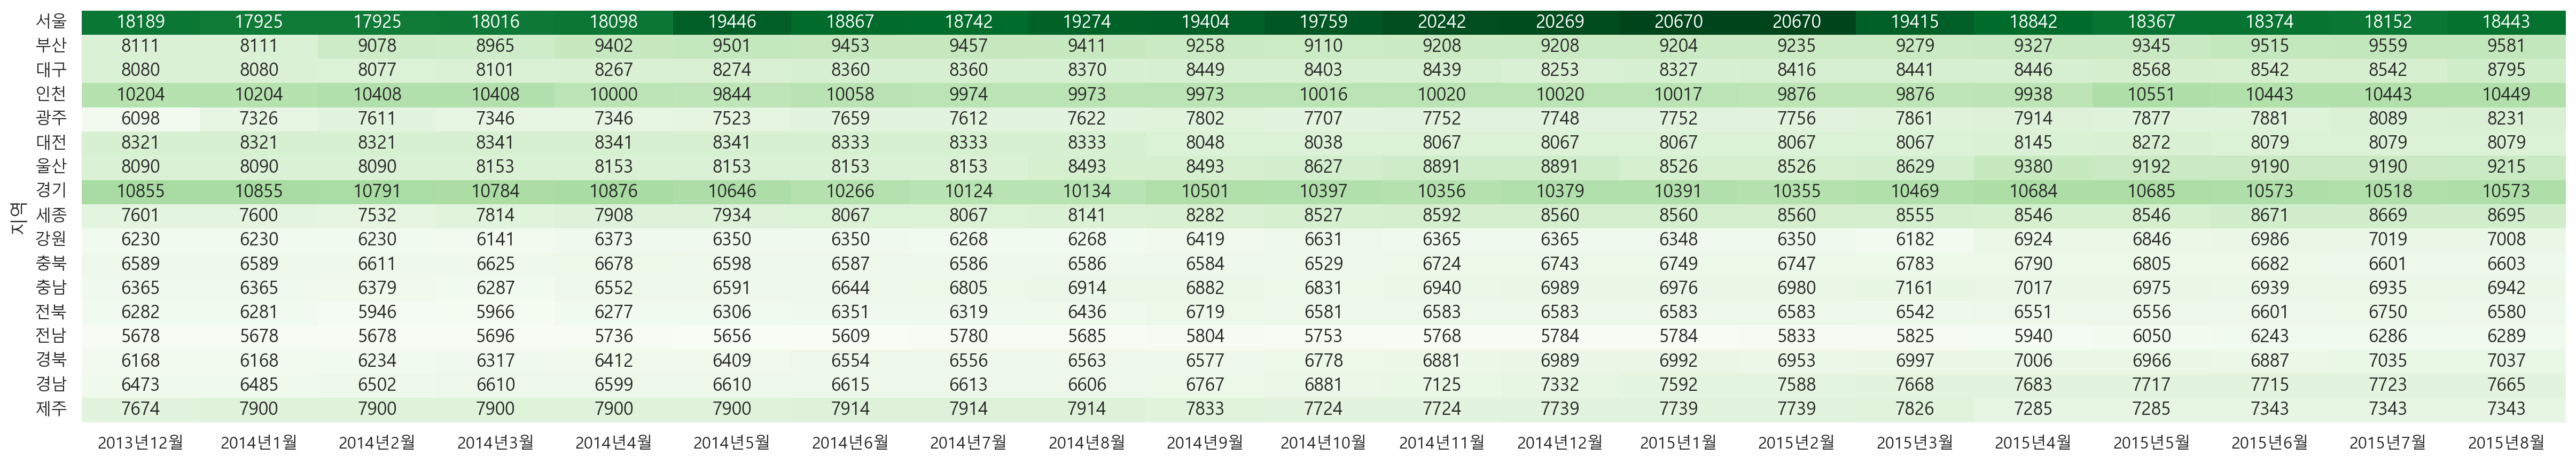

In [16]:
plt.figure(figsize=(30,5))
sns.heatmap(df_first.set_index('지역'), cmap='Greens', annot=True, fmt=".0f", cbar=False)
plt.show()

In [26]:
# 2번 문제
df_last = pd.read_csv(r'C:\ai\downloads\shareData\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv', encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [27]:
df_last['평당분양가격'] = pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))
df_last['평당분양가격'] = df_last['평당분양가격'] * 3.3
#print(df_last.isna().sum())
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,19400.7
...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703,25419.9
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,24799.5
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN


In [28]:
# 분양가격[제곱미터] 열 없애기
df_last.drop('분양가격(제곱미터)', axis=1, inplace=True)
df_last

,지역명,규모구분,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,24799.5
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [32]:
# 3번 문제
df_last.pivot_table(values='평당분양가격', index='연도', columns='지역명').round(0)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8191.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017,7319.0,12296.0,8807.0,8288.0,9600.0,12192.0,9913.0,11638.0,21864.0,9133.0,10630.0,11672.0,7413.0,7406.0,12629.0,8157.0,7463.0
2018,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019,8934.0,15666.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0
2020,10302.0,15106.0,10919.0,9998.0,13406.0,15314.0,11239.0,13353.0,29781.0,11628.0,12838.0,14983.0,9562.0,8559.0,14193.0,9139.0,8359.0
2021,10291.0,14567.0,11302.0,11227.0,13710.0,15586.0,11994.0,14318.0,29380.0,12578.0,14192.0,15774.0,9981.0,9048.0,22302.0,9861.0,8822.0
2022,11644.0,16622.0,12456.0,12018.0,15096.0,16822.0,14114.0,18167.0,29129.0,11310.0,17904.0,17342.0,10636.0,10003.0,18954.0,11730.0,10034.0
2023,13409.0,20175.0,13283.0,13025.0,17958.0,17657.0,17917.0,20471.0,33231.0,12278.0,18832.0,16151.0,11847.0,10966.0,24096.0,12581.0,11104.0


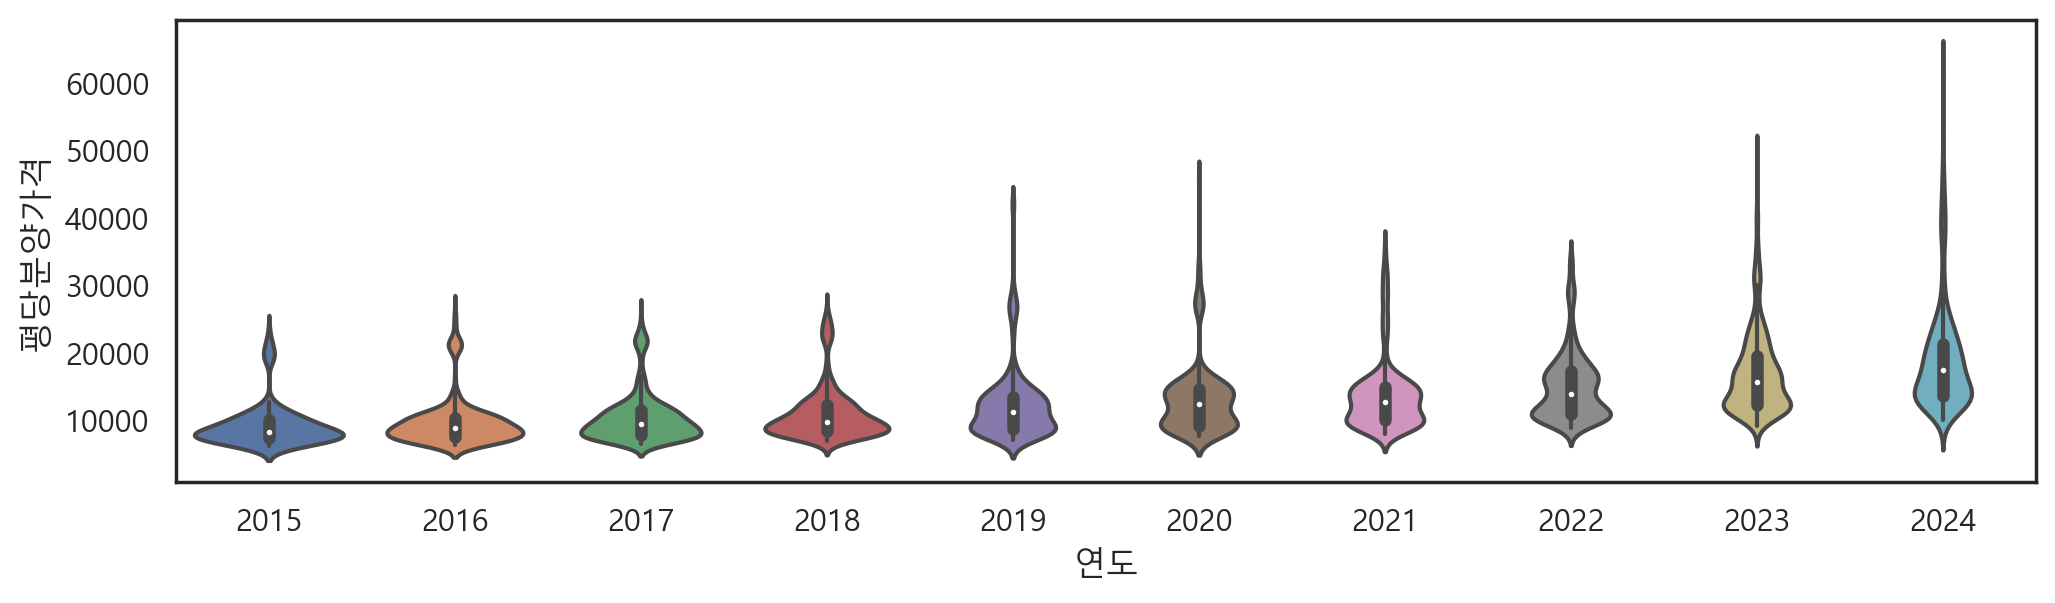

In [34]:
# 4번 문제
sns.violinplot(data=df_last, x='연도', y='평당분양가격')
plt.show()

In [69]:
# 5번 문제
# concat을 위한 df_first 처리하기
new_first = df_first.melt(id_vars='지역', value_name='평당분양가격', var_name='연도월')
new_first['연도'] = new_first['연도월'].apply(lambda datestr : int(datestr.split('년')[0]))
new_first['월'] = new_first['연도월'].apply(lambda datestr : int(datestr.split('년')[1][:-1]))
new_first.drop('연도월', axis=1, inplace=True)
new_first.rename(columns={'지역':'지역명'}, inplace=True)
print(new_first.shape)
new_first.sample(2)

(357, 4)


,지역명,평당분양가격,연도,월
214,충북,6743,2014,12
288,제주,7285,2015,4


In [70]:
#concat을 위한 df_last 처리하기
new_last = df_last[df_last['규모구분']=='모든면적']
new_last.drop('규모구분', axis=1, inplace=True)
print(new_last.shape)
new_last.sample(2)

(1819, 4)


,지역명,연도,월,평당분양가격
3795,충남,2019,6,8639.4
6725,경기,2022,5,16031.4


In [71]:
# concat을 이용하여 합치기
df = pd.concat([new_first, new_last]).reset_index(drop=True)
display(df)

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8
